In [1]:
import re, nltk
from konlpy.tag import Okt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

In [2]:
with open('data/스포츠.txt') as file:
    text = file.read()

In [3]:
okt = Okt()
tokens = okt.nouns(text)
tokens[:10]

['윤', '대통령', '지인', '홈런', '타자', '정현발', '별세', '한가위', '키즈', '랜드']

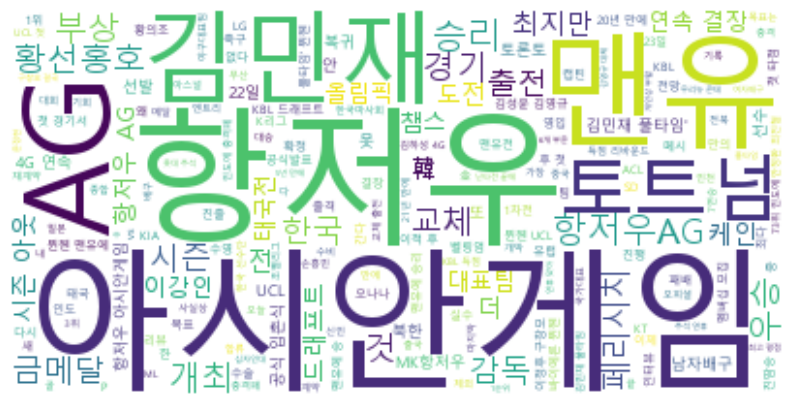

In [11]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='C:windows/Fonts/malgun.ttf',
    relative_scaling= 0.5
    ).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

In [15]:
# 영문자, 숫자, 구둣점 제거
new_tokens = []
for token in tokens:
    item = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '', token)
    if item:        # 빈 문자열이면 False, 즉 빈 문자열이 아닌것만 추가
        new_tokens.append(item)

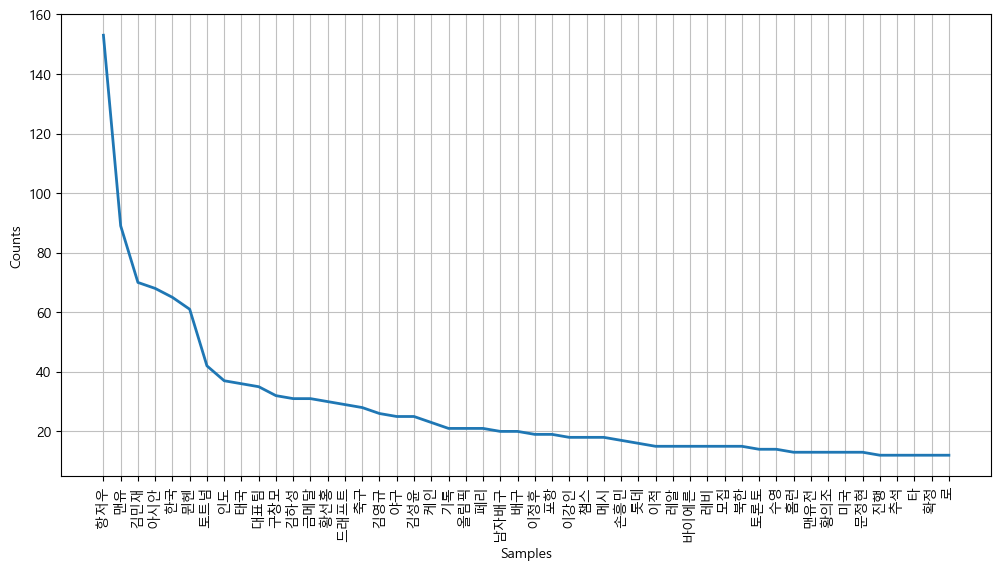

In [28]:
title = nltk.Text(new_tokens, name='스포츠 뉴스')
plt.figure(figsize=(12, 6))
title.plot(50); 

In [27]:
stoptext = """
    전 경기 게임 승리 첫 위 연속 시즌 최 승 개최 부상 교체 리그 팀 감독 골 패 우승 출전 충격
    호 후 선수 결장 풀타임 수비 아웃 순위 선수단 공식 복귀 연승 도전 대회 부활 팬 강 등 것 끝 
    개 치 결승 타점 입촌 못 연패 기독 목표 선발 수 인터뷰 실점 안 더 최고 행 난타 점 스포츠
    제 득점 십자 대체 발탁 또 세계 새 인대 간다 기 합류 현장 중 진 평점 실수 패배 개인 캡틴
    수술 컵 진땀 나나 종합
"""
stop_words = stoptext.split()
new_tokens = [token for token in new_tokens if token not in stop_words]
new_tokens[:10]

['윤', '대통령', '지인', '홈런', '타자', '정현발', '별세', '한가위', '키즈', '랜드']

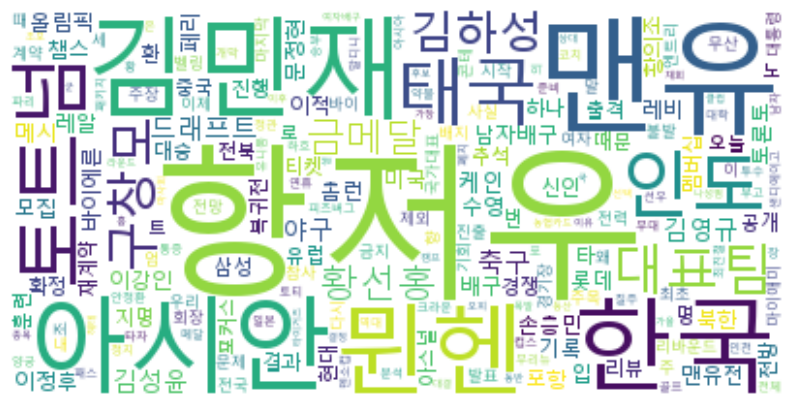

In [31]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='C:windows/Fonts/malgun.ttf',
    relative_scaling= 0.6
    ).generate_from_frequencies(dict(title.vocab().most_common(300)))

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');